In [1]:
# import community
import numpy as np
import networkx as nx
import matplotlib as mpl
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import graphviz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import random
import pydoc
from ds import McmcTree as Tree
from utils import ColorPrint as _

import sys
sys.path.append("..")
from datasets.synthetic.generator import TreeGenerator



font = {'weight' : 'normal',
        'size'   : 24}

mpl.rc('font', **font)

In [61]:
import matplotlib.patches as mpatches

In [2]:
### load random data
M = 15
N = 20
ZETA = 1
Gamma = 0.15
alpha = 0.002
beta = 0.03
MR = 0.02

tg = TreeGenerator(
    M = M,
    N = N,
    ZETA = ZETA,
    Gamma = Gamma,
    alpha = alpha,
    beta = beta,
    MR = MR,
)
(gt_E, gt_D, D, gt_T) = tg.generate()
gensNames = list( str(i) for i in range(M) )
print(gensNames)



C_num = D.shape[1]
G_num = D.shape[0]
_.print_warn( 'There is {} cells and {} mutations at {} genes in this dataset.'.format(C_num, G_num, len(gensNames)) )



# ### fill missed data
# def tf(m,c):
#     os = len(np.where(D[:,c]==1.))*1.
#     zs = len(np.where(D[:,c]==0.))*1.
#     return 1. if np.random.rand() < os/(os+zs) else 0.

# for m in range(G_num):
#     for c in range(C_num):
#         if D[m,c] == 3.:
#             D[m,c] = tf(m,c)


### Run
dl = list(d for d in D)
root = [n for n,d in gt_T.in_degree() if d==0][0]
print('ROOT:', root)
T = Tree(gensNames, D, data_list=dl, root=str(root), alpha=alpha, beta=beta)
T.set_ground_truth(gt_D, gt_E, gt_T=gt_T)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
ROOT: 11
New mcmc tree named: My Tree


There is 20 cells and 15 mutations at 15 genes in this dataset.


0 [data="[0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0]"]
1 [data="[1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1]"]
2 [data="[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]"]
3 [data="[0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0]"]
4 [data="[0 0 0 0 3 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0]"]
5 [data="[0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0]"]
6 [data="[0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0]"]
7 [data="[1 1 0 1 1 1 1 1 0 1 0 1 3 1 1 1 0 1 0 0]"]
8 [data="[0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0]"]
9 [data="[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]"]
10 [data="[0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0]"]
11 [data="[1 1 1 1 0 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1]"]
12 [data="[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]"]
13 [data="[0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0]"]
14 [data="[0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0]"]
"6|-74.6"
"9|-68.4"
"11|-74.6"
"15|-68.4"
"0|-12.5"
"3|-12.5"
"4|-24.9"
"5|-56.0"
"12|-6.3"
"13|-49.8"
"14|-12.5"
"17|-56.0"
"19|-6.3"
"2|-6.3"
"8|-12.5"
"18|-12.5"
"7|-18.7"
"10|-0.1"
"16|-0.1"
"1|-3

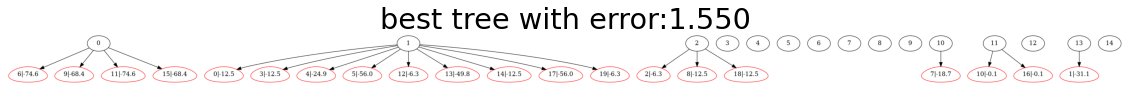

In [3]:
T.randomize()
T.plot_best_T('initial T')
# T.plot('T0')

T.set_rho(10)

for i in range(5000):
    if T.next():
        break


T.plot_all_results()

In [4]:
run_data = T.run_data
rd = np.array(run_data)
errors = T.get_errors()

In [5]:
rd

array([[1.00000000e+00, 1.57800000e+01, 8.36078379e-01],
       [2.00000000e+00, 1.32800000e+01, 1.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 5.89794059e-01],
       ...,
       [4.99800000e+03, 5.20000000e+00, 4.18291527e-20],
       [4.99900000e+03, 6.00000000e-02, 1.00000000e+00],
       [5.00000000e+03, 2.60000000e+00, 0.00000000e+00]])

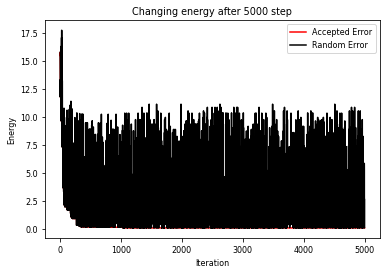

In [6]:
plt.plot(errors, 'r', label='Accepted Error') # accepted errors
plt.plot(rd[:, -2], 'k', label='Random Error') # random errors
# plt.plot(self.enrgs) # best errors
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Changing energy after {} step'.format(5000))
# if filename:
#     plt.savefig(filename)
plt.show()

In [40]:
new_acc_errors = []
new_random_errors = []
for i, t in enumerate(rd):
    rnd = np.random.rand()
    if t[-1] > rnd/10000:
        new_acc_errors.append(errors[i])
        new_random_errors.append(t[-2])

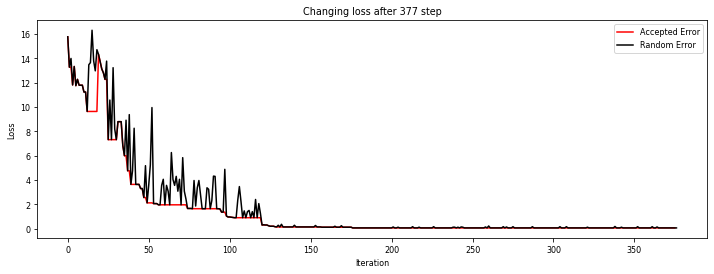

In [41]:
plt.figure(figsize=(12, 4))
plt.plot(new_acc_errors[1:], 'r', label='Accepted Error') # accepted errors
plt.plot(new_random_errors, 'k', label='Random Error') # random errors
# plt.plot(self.enrgs) # best errors
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Changing loss after {} step'.format(len(new_random_errors)))
# if filename:
#     plt.savefig(filename)
plt.show()

In [9]:
T.plot_all_results(plot_pm=True)

In [10]:
# T.plot_all_results()

In [42]:
D = T.D

In [59]:
np.unique(D)

array([0, 1, 3])

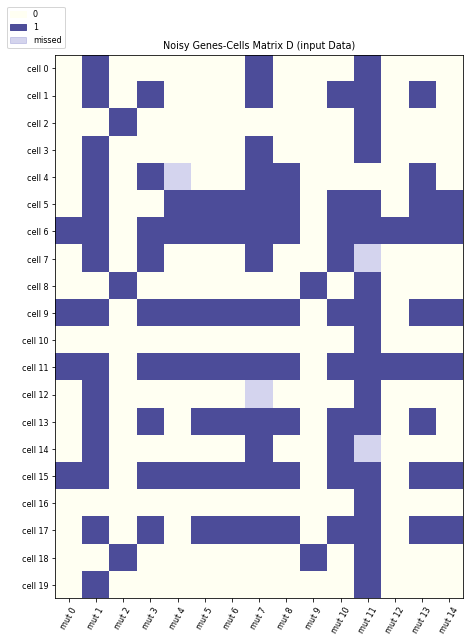

In [70]:
# D
M = D.shape[0]
N = D.shape[1]
plt.figure(figsize=(M*0.5,N*0.5))
# plt.imshow(D.T-1, cmap='GnBu', interpolation="nearest")

t=1
cmap = {0:[1,1,0.95,t], 1:[0.3,0.3,0.6,t], 3:[0.5,0.5,0.8,t/3]}
labels = {0:'0', 1:'1', 3:'missed'}
arrayShow = np.array([[cmap[i] for i in j] for j in D.T])    
## create patches as legend
patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]
plt.imshow(arrayShow, interpolation="nearest")
plt.legend(handles=patches, loc=2, borderaxespad=-6)

plt.yticks(range(D.shape[1]), ['cell %d'%i for i in range(N)])
plt.xticks(range(D.shape[0]), [ 'mut %d'%i for i in range(M)])
plt.xticks(rotation=60)
plt.title("Noisy Genes-Cells Matrix D (input Data)")
# file_path = '{}D_{}.png'.format('./', str_params)
# plt.savefig(file_path)
plt.show()

In [50]:
D.shape

(15, 20)